In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('/content/sample_data/2017_jun_final - 2017_jun_final.csv')

In [77]:
print(data.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [78]:
print("Розмір:", data.shape) # Розмір: (8704, 25)

Розмір: (8704, 25)


In [79]:
print("Типи:", data.dtypes)

Типи: N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                    

In [80]:
# Частка пропусків міститься в кожній колонці
print(data.isnull().sum()/ len(data))

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [81]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
# метод dropna призначений спеціально для видалення рядків або стовпців, які містять пропущені значення.
col_list = [col for col in data.columns if col not in ["Мова програмування"]]
data_drop = data[col_list].dropna(axis=1, how='any')
join_data = pd.concat([data_drop, data[['N', 'Мова програмування']]], axis=1, join='outer')

In [87]:
# Знову порахуйте, яка частка пропусків міститься в кожній колонці
# Переконайтеся, що залишився тільки стовпець "Мова.програмування"
print(join_data.isnull().sum()/ len(join_data))
print('*********************************')
print(join_data.columns)

N                                   0.000000
Посада                              0.000000
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Ще студент                          0.000000
Рівень англійської                  0.000000
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
N                                   0.000000
Мова програмування                  0.442325
dtype: float64
*********************************
Index(

In [88]:
# Видаліть усі рядки у вихідній таблиці за допомогою методу
join_data.dropna(inplace=True)

In [89]:
# Визначте новий розмір таблиці за допомогою методу shape
print(join_data.shape)

(4854, 21)


In [90]:
# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = data[data['Мова програмування'].str.contains('Python', na=False)]
print(python_data)

         N                    Посада Мова програмування Спеціалізація  \
12      13         Software Engineer             Python           NaN   
68      69         Software Engineer             Python           NaN   
87      88  Junior Software Engineer             Python           NaN   
114    115  Junior Software Engineer             Python           NaN   
143    144  Junior Software Engineer             Python           NaN   
...    ...                       ...                ...           ...   
8546  8547         Software Engineer             Python           NaN   
8625  8626         Software Engineer             Python           NaN   
8635  8636  Senior Software Engineer             Python           NaN   
8673  8674  Junior Software Engineer             Python           NaN   
8695  8696         Software Engineer             Python           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
12                         1                  менше 3 міся

In [91]:
# Визначте розмір таблиці python_data за допомогою методу shape
print(python_data.shape)

(207, 25)


In [92]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
grouped_by_posada = data.groupby('Посада')
print(grouped_by_posada)

In [93]:
# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада",
# виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
grouped_by_posada = data.groupby('Посада')['Зарплата на місяць'].agg(['min', 'max'])
print(grouped_by_posada)

                                             min    max
Посада                                                 
Business analyst                             200   5000
DBA                                          380   6000
Data Scientist / Data Analyst                150   8000
Designer                                     100   4000
DevOps                                       194  10000
Director of Engineering / Program Director  1500  34000
ERP / CRM                                    100   6000
Game designer                                150   6800
HR                                           100   7000
HTML coder                                   154   3000
Junior QA engineer                            96   2000
Junior Software Engineer                      75   2600
Marketing                                    100   4000
Product Manager                              250   5000
Project manager                              190   8000
QA Tech Lead                                 430

In [94]:
# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць.
# Використовуйте її для методу apply та створіть новий стовпчик "avg"


def fill_avg_salary(column):
    return column.mean()

# Агрегація даних за посадами та обчислення мінімального, максимального значень і середнього
grouped_by_posada = data.groupby('Посада')['Зарплата на місяць'].apply(fill_avg_salary).reset_index(name='avg')

# Додавання стовпців з мінімальним та максимальним значеннями
grouped_by_posada[['min', 'max']] = data.groupby('Посада')['Зарплата на місяць'].agg(['min', 'max']).reset_index(drop=True)

# Виведення результатів
print(grouped_by_posada)

                                        Посада          avg   min    max
0                             Business analyst  1551.500000   200   5000
1                                          DBA  1653.269231   380   6000
2                Data Scientist / Data Analyst  1544.240506   150   8000
3                                     Designer  1134.161435   100   4000
4                                       DevOps  2162.688235   194  10000
5   Director of Engineering / Program Director  5066.363636  1500  34000
6                                    ERP / CRM  1370.833333   100   6000
7                                Game designer  1455.277778   150   6800
8                                           HR   850.283401   100   7000
9                                   HTML coder   550.993590   154   3000
10                          Junior QA engineer   482.774752    96   2000
11                    Junior Software Engineer   605.658594    75   2600
12                                   Marketing   86

In [95]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.
avg_stats = grouped_by_posada['avg'].describe()
print(avg_stats)

count      32.000000
mean     1800.566187
std      1170.804714
min       482.774752
25%       858.532807
50%      1528.543434
75%      2363.147188
max      5066.363636
Name: avg, dtype: float64


In [96]:
# Збережіть отриману таблицю в CSV файл
write_to_csv = avg_stats.to_csv('descriptive statistics.csv', index=False)

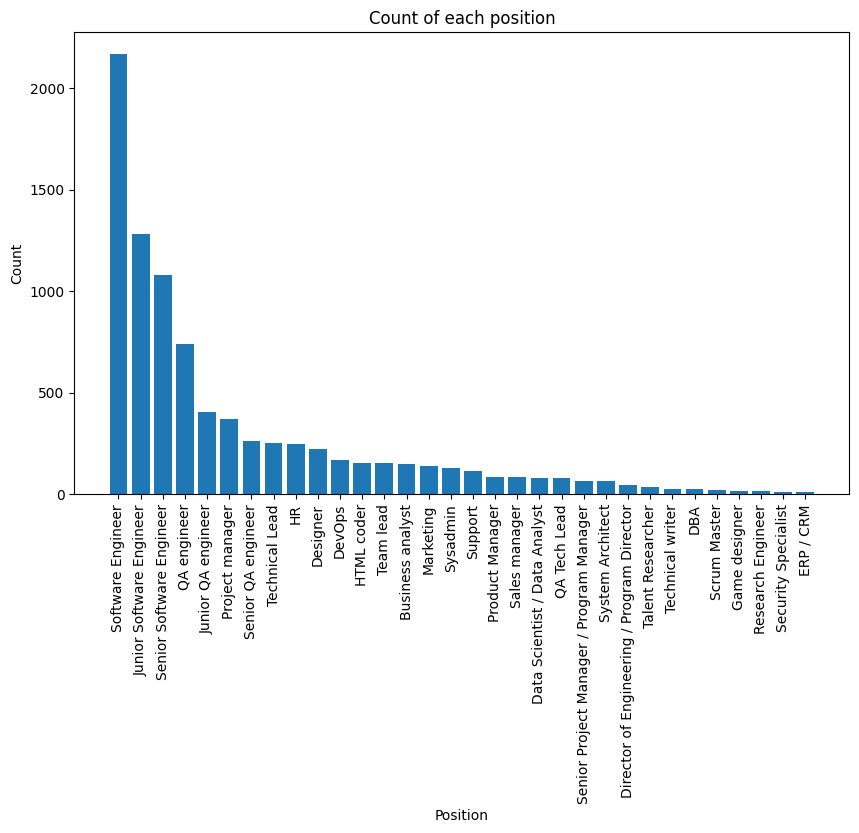

In [97]:
# Графік
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/2017_jun_final - 2017_jun_final.csv')

position_counts = data['Посада'].value_counts()

# Графік'Посада'
plt.figure(figsize=(10, 6))
plt.bar(position_counts.index, position_counts.values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Count of each position')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


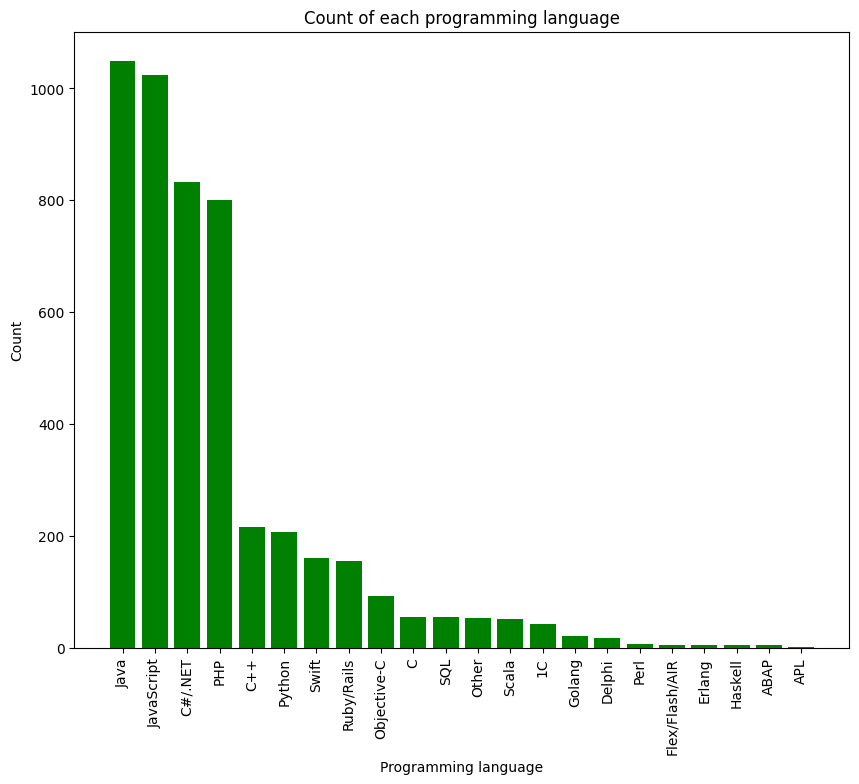

In [98]:
# Графік 'Мова програмування'
plt.figure(figsize=(10, 8))
language_counts = data['Мова програмування'].value_counts()
plt.bar(language_counts.index, language_counts.values, color='green')
plt.xlabel('Programming language')
plt.ylabel('Count')
plt.title('Count of each programming language')
plt.xticks(rotation=90)
plt.show()

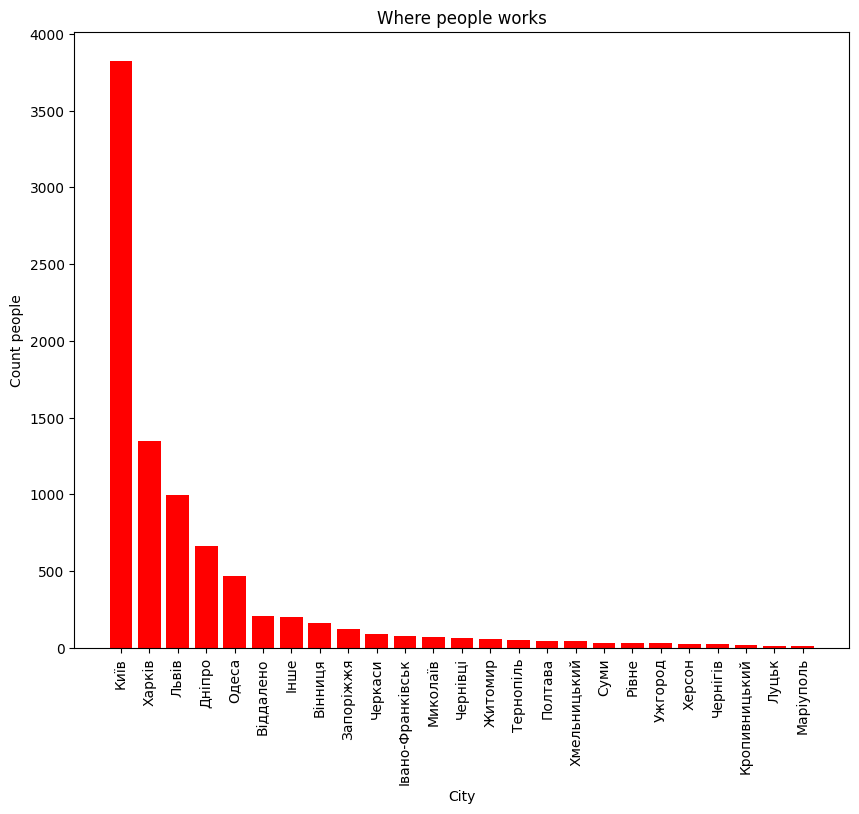

In [99]:
plt.figure(figsize=(10, 8))
city_counts = data['Місто'].value_counts()
plt.bar(city_counts.index, city_counts.values, color = 'red')
plt.xlabel('City')
plt.ylabel('Count people')
plt.title('Where people works')
plt.xticks(rotation=90)
plt.show()